In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 10000  # número de clientes

df = pd.DataFrame({
    "Age": np.random.randint(18, 80, size=n),
    "Tenure": np.random.randint(0, 10, size=n),
    "Balance": np.round(np.random.normal(100000, 50000, size=n), 2),
    "NumOfProducts": np.random.randint(1, 4, size=n),
    "HasCrCard": np.random.randint(0, 2, size=n),
    "IsActiveMember": np.random.randint(0, 2, size=n),
    "EstimatedSalary": np.round(np.random.normal(70000, 30000, size=n), 2),
    "Geography": np.random.choice(["France", "Germany", "Spain"], size=n),
    "Gender": np.random.choice(["Male", "Female"], size=n),
})

# Generar la columna objetivo: churn
df["Exited"] = (
    (df["IsActiveMember"] == 0).astype(int) +
    (df["NumOfProducts"] == 1).astype(int) +
    (df["Balance"] > 120000).astype(int) +
    (df["Geography"] == "Germany").astype(int)
)

# Agregar algo de aleatoriedad
df["Exited"] = (df["Exited"] + np.random.randint(0, 2, size=n)) >= 2
df["Exited"] = df["Exited"].astype(int)

df.head()


,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender,Exited
0,56,9,61286.50,2,0,0,97133.03,Spain,Female,1
1,69,4,88816.67,3,0,0,69265.12,France,Female,1
2,46,6,116530.66,1,1,0,42082.58,France,Female,1
3,32,4,71732.50,1,1,0,98212.00,Spain,Female,1
4,60,0,107170.30,2,1,0,77529.43,Germany,Male,1


In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 10000  # número de clientes

df = pd.DataFrame({
    "Age": np.random.randint(18, 80, size=n),
    "Tenure": np.random.randint(0, 10, size=n),
    "Balance": np.round(np.random.normal(100000, 50000, size=n), 2),
    "NumOfProducts": np.random.randint(1, 4, size=n),
    "HasCrCard": np.random.randint(0, 2, size=n),
    "IsActiveMember": np.random.randint(0, 2, size=n),
    "EstimatedSalary": np.round(np.random.normal(70000, 30000, size=n), 2),
    "Geography": np.random.choice(["France", "Germany", "Spain"], size=n),
    "Gender": np.random.choice(["Male", "Female"], size=n),
})

# Generar la columna objetivo: churn
df["Exited"] = (
    (df["IsActiveMember"] == 0).astype(int) +
    (df["NumOfProducts"] == 1).astype(int) +
    (df["Balance"] > 120000).astype(int) +
    (df["Geography"] == "Germany").astype(int)
)

# Agregar algo de aleatoriedad
df["Exited"] = (df["Exited"] + np.random.randint(0, 2, size=n)) >= 2
df["Exited"] = df["Exited"].astype(int)

df.head()


,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender,Exited
0,56,9,61286.50,2,0,0,97133.03,Spain,Female,1
1,69,4,88816.67,3,0,0,69265.12,France,Female,1
2,46,6,116530.66,1,1,0,42082.58,France,Female,1
3,32,4,71732.50,1,1,0,98212.00,Spain,Female,1
4,60,0,107170.30,2,1,0,77529.43,Germany,Male,1


In [4]:
# Convertir categorías a números
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Separar variables
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 447  178]
 [ 196 1179]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       625
           1       0.87      0.86      0.86      1375

    accuracy                           0.81      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.81      0.81      0.81      2000



/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:54:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744329020674/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


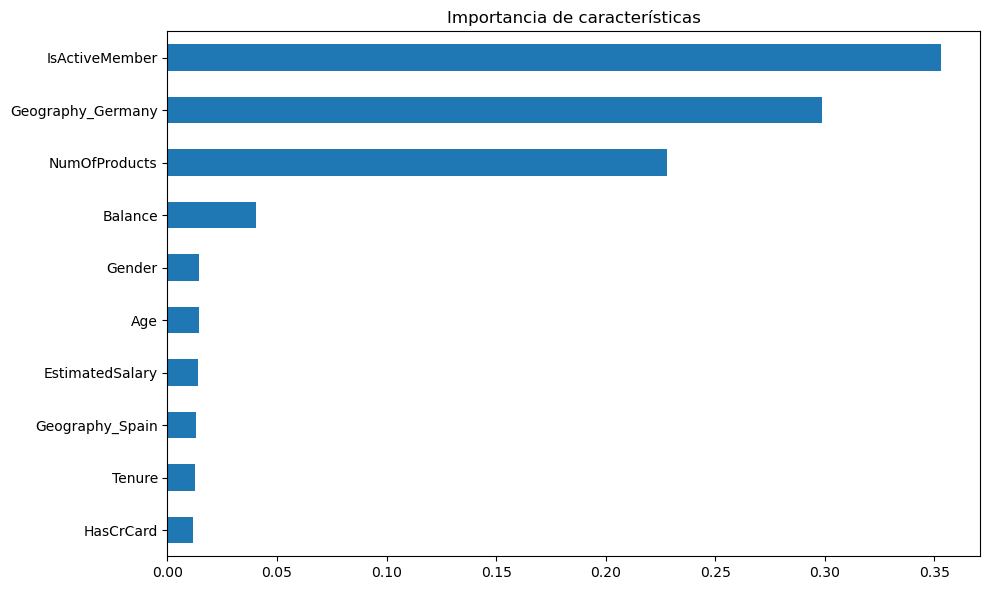

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title("Importancia de características")
plt.tight_layout()
plt.show()
